In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#import all lib that i need
import pandas as pd
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from pandas.core.reshape import concat
import random as rd

import text_process_functions as tpf

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\osci1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading english: Package 'english' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osci1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\osci1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#load data
df_large = pd.read_csv("enron_spam_data.csv")
df_large

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [3]:
#change name of some columns
df_large.rename(columns = {"Message":"text", "Spam/Ham":"type"}, inplace = True)
df_large

,Message ID,Subject,text,type,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [4]:
#drop message ID, subject and date --> columns that is not needed
df_large.drop(["Message ID","Subject","Date"], axis = 1, inplace = True)

#remove null values
df_large[df_large["text"].isnull() == True].index
df_large.drop(df_large[df_large["text"].isnull() == True].index, inplace = True)

In [5]:
#convert spam = 1 and ham = 0
def changeToNum(typ):
  if typ == "spam":
    return 1
  else:
    return 0

df_large["type"] = df_large["type"].apply(changeToNum)
df_large

,text,type
1,"gary , production from the high island larger ...",0
2,- calpine daily gas nomination 1 . doc,0
3,fyi - see note below - already done .\nstella\...,0
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0
5,"jackie ,\nsince the inlet to 3 river plant is ...",0
...,...,...
33711,"hello , welcome to gigapharm onlinne shop .\np...",1
33712,i got it earlier than expected and it was wrap...,1
33713,are you ready to rock on ? let the man in you ...,1
33714,learn how to last 5 - 10 times longer in\nbed ...,1


In [6]:
#remove null values
df_large[df_large["text"].isnull() == True].index
df_large.drop(df_large[df_large["text"].isnull() == True].index, inplace = True)

In [7]:
#drop duplicates
df_large.drop_duplicates(subset = "text",inplace = True)

type
0    15793
1    13986
Name: count, dtype: int64


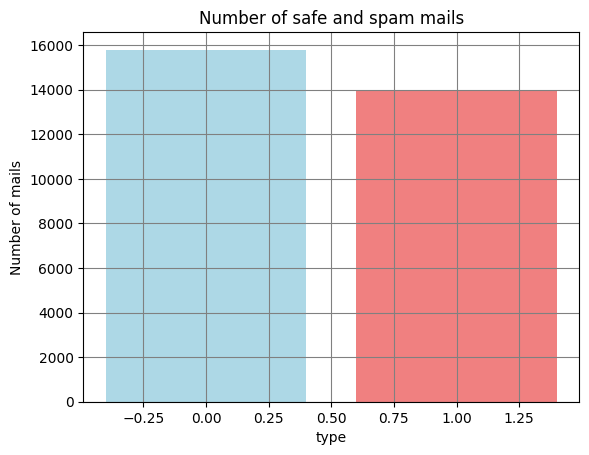

In [8]:
#look at how many spam and ham there are
email_count = df_large["type"].value_counts()

unique_email = email_count.index.tolist()
print(email_count)
plt.bar(unique_email, email_count, color = ["lightblue","lightcoral"])
plt.title("Number of safe and spam mails")
plt.xlabel("type")
plt.ylabel("Number of mails")
plt.grid(color="gray")

Can see that the data is relative balanced, which is good. Somewhat more non-spam.

In [9]:
#tokenize the text
df_large["tokens"] = df_large["text"].apply(tpf.tokenText)

In [10]:
df_large

,text,type,tokens
1,"gary , production from the high island larger ...",0,"[gary, ,, production, from, the, high, island,..."
2,- calpine daily gas nomination 1 . doc,0,"[-, calpine, daily, gas, nomination, 1, ., doc]"
3,fyi - see note below - already done .\nstella\...,0,"[fyi, -, see, note, below, -, already, done, ...."
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,"[fyi, ., -, -, -, -, -, -, -, -, -, -, -, -, -..."
5,"jackie ,\nsince the inlet to 3 river plant is ...",0,"[jackie, ,, since, the, inlet, to, 3, river, p..."
...,...,...,...
33709,"hello ,\ndid you ejaculate before or within a ...",1,"[hello, ,, did, you, ejaculate, before, or, wi..."
33711,"hello , welcome to gigapharm onlinne shop .\np...",1,"[hello, ,, welcome, to, gigapharm, onlinne, sh..."
33712,i got it earlier than expected and it was wrap...,1,"[i, got, it, earlier, than, expected, and, it,..."
33713,are you ready to rock on ? let the man in you ...,1,"[are, you, ready, to, rock, on, ?, let, the, m..."


### Remove stopwords

In [11]:
df_large["stopwords_removed"] = df_large["tokens"].apply(tpf.removeStopwords)

In [12]:
df_large.drop(columns=["text", "tokens"],axis=0, inplace = True)
df_large

,type,stopwords_removed
1,0,"[gary, production, high, island, larger, block..."
2,0,"[calpine, daily, gas, nomination, 1, doc]"
3,0,"[fyi, see, note, already, done, stella, forwar..."
4,0,"[fyi, forwarded, lauri, allen, 12, 14, 99, 12,..."
5,0,"[jackie, since, inlet, 3, river, plant, shut, ..."
...,...,...
33709,1,"[hello, ejaculate, within, minutes, penetratio..."
33711,1,"[hello, welcome, gigapharm, onlinne, shop, pre..."
33712,1,"[got, earlier, expected, wrapped, cautiously, ..."
33713,1,"[ready, rock, let, man, rise, solitude, shows,..."


Stemming

In [14]:
df_large["stem_words"] = df_large["stopwords_removed"].apply(tpf.stemlem, args = ("stemming",))
df_large

,type,stopwords_removed,stem_words
1,0,"[gary, production, high, island, larger, block...","[gari, product, high, island, larger, block, 1..."
2,0,"[calpine, daily, gas, nomination, 1, doc]","[calpin, daili, ga, nomin, 1, doc]"
3,0,"[fyi, see, note, already, done, stella, forwar...","[fyi, see, note, alreadi, done, stella, forwar..."
4,0,"[fyi, forwarded, lauri, allen, 12, 14, 99, 12,...","[fyi, forward, lauri, allen, 12, 14, 99, 12, 1..."
5,0,"[jackie, since, inlet, 3, river, plant, shut, ...","[jacki, sinc, inlet, 3, river, plant, shut, 10..."
...,...,...,...
33709,1,"[hello, ejaculate, within, minutes, penetratio...","[hello, ejacul, within, minut, penetr, prematu..."
33711,1,"[hello, welcome, gigapharm, onlinne, shop, pre...","[hello, welcom, gigapharm, onlinn, shop, presc..."
33712,1,"[got, earlier, expected, wrapped, cautiously, ...","[got, earlier, expect, wrap, cautious, impress..."
33713,1,"[ready, rock, let, man, rise, solitude, shows,...","[readi, rock, let, man, rise, solitud, show, u..."


In [15]:
df_large.to_csv("processed_data.csv")